### Importing Libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
plt.rcParams['figure.figsize'] = [9.5, 6] # matplotlib plot size bigger

### Loading Images

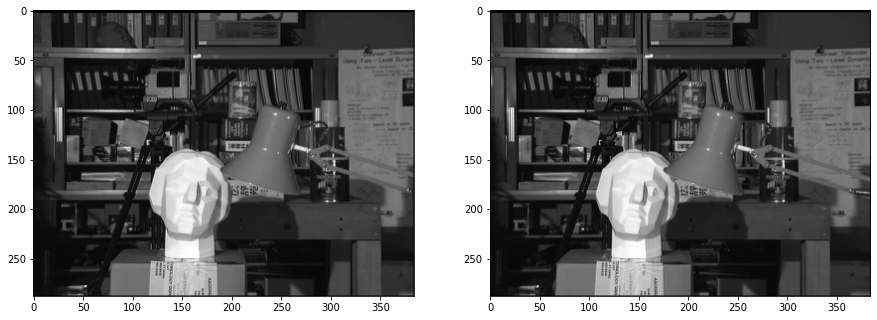

(288, 384)


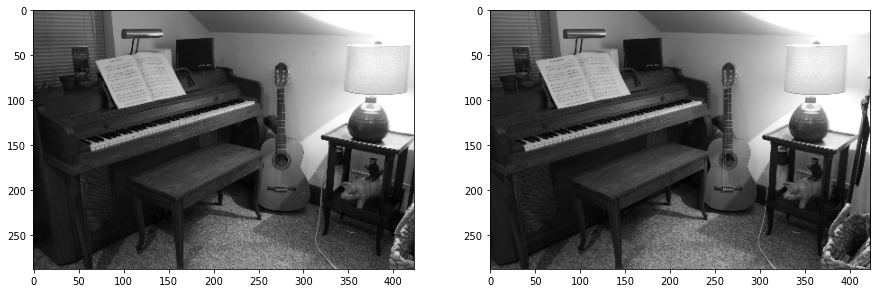

(288, 423)


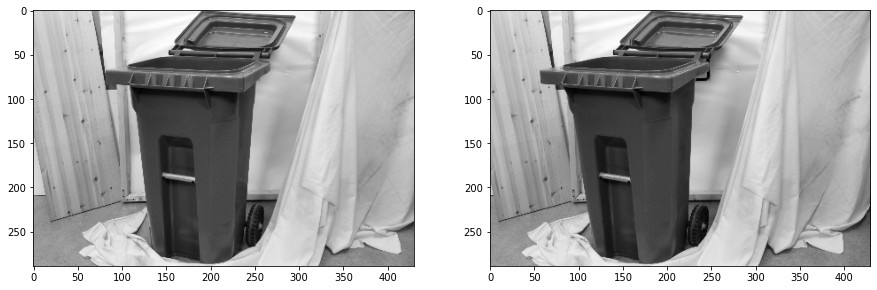

(289, 430)


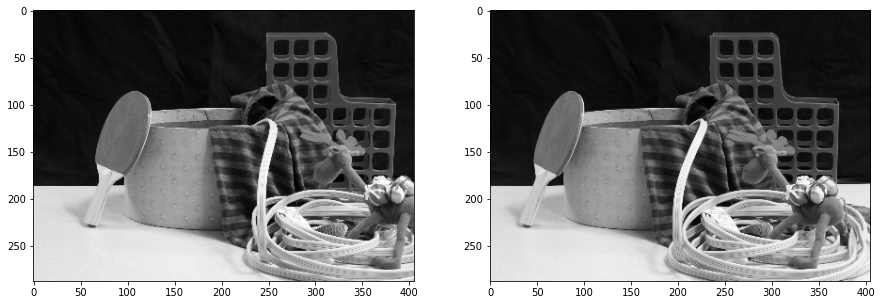

(288, 405)


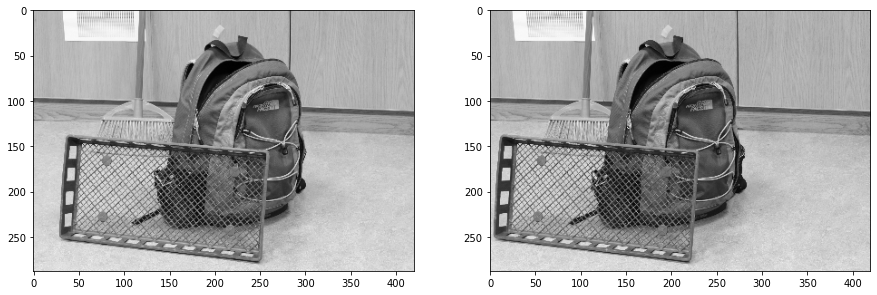

(288, 420)


In [3]:
img1a = cv2.imread("tsukuba_L.png", 0)
img1b = cv2.imread("tsukuba_R.png", 0)
img2a = cv2.imread("piano_L.png", 0)
img2b = cv2.imread("piano_R.png", 0)
img3a = cv2.imread("bin_L.png", 0)
img3b = cv2.imread("bin_R.png", 0)
img4a = cv2.imread("cable_L.png", 0)
img4b = cv2.imread("cable_R.png", 0)
img5a = cv2.imread("backpack_L.png", 0)
img5b = cv2.imread("backpack_R.png", 0)
fig = plt.figure(figsize=(15, 15))
fig.add_subplot(121)
plt.imshow(img1a, cmap='gray')
fig.add_subplot(122)
plt.imshow(img1b, cmap='gray')
plt.show()
print(img1a.shape)

fig = plt.figure(figsize=(15, 15))
fig.add_subplot(121)
img2a = cv2.resize(img2a, (0, 0), fx=0.15, fy=0.15)
img2b = cv2.resize(img2b, (0, 0), fx=0.15, fy=0.15)
plt.imshow(img2a, cmap='gray')
fig.add_subplot(122)
plt.imshow(img2b, cmap='gray')
plt.show()
print(img2a.shape)

fig = plt.figure(figsize=(15, 15))
fig.add_subplot(121)
img3a = cv2.resize(img3a, (0, 0), fx=0.15, fy=0.15)
img3b = cv2.resize(img3b, (0, 0), fx=0.15, fy=0.15)
plt.imshow(img3a, cmap='gray')
fig.add_subplot(122)
plt.imshow(img3b, cmap='gray')
plt.show()
print(img3a.shape)

fig = plt.figure(figsize=(15, 15))
fig.add_subplot(121)
img4a = cv2.resize(img4a, (0, 0), fx=0.145, fy=0.145)
img4b = cv2.resize(img4b, (0, 0), fx=0.145, fy=0.145)
plt.imshow(img4a, cmap='gray')
fig.add_subplot(122)
plt.imshow(img4b, cmap='gray')
plt.show()
print(img4a.shape)

fig = plt.figure(figsize=(15, 15))
fig.add_subplot(121)
img5a = cv2.resize(img5a, (0, 0), fx=0.143, fy=0.143)
img5b = cv2.resize(img5b, (0, 0), fx=0.143, fy=0.143)
plt.imshow(img5a, cmap='gray')
fig.add_subplot(122)
plt.imshow(img5b, cmap='gray')
plt.show()
print(img5a.shape)


### Disparity Maps using OpenCV

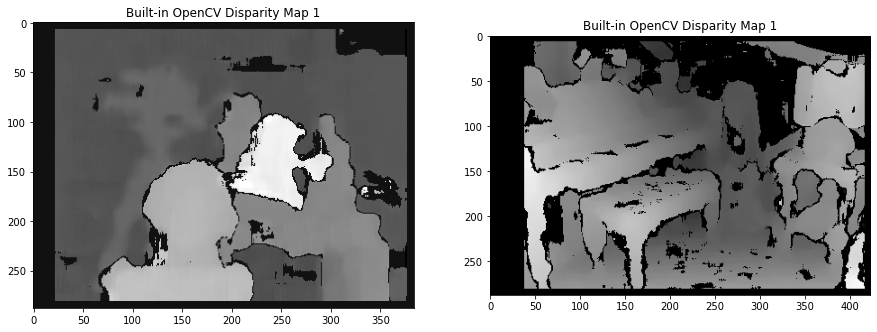

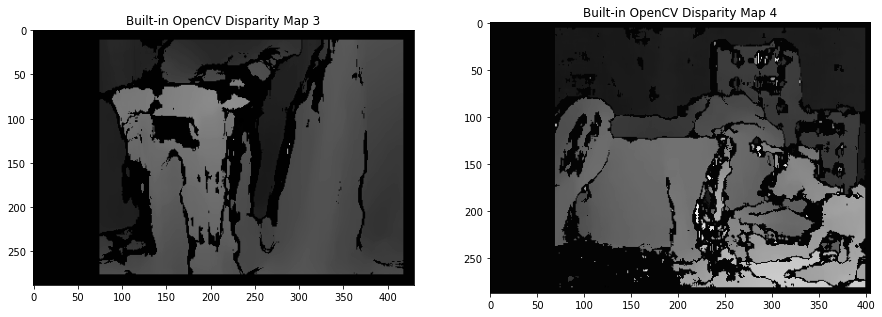

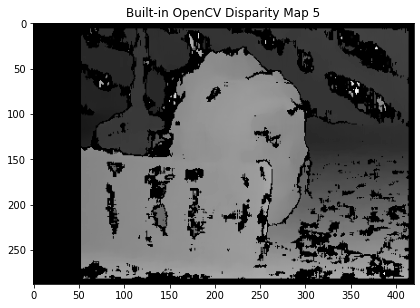

In [47]:

fig = plt.figure(figsize=(15, 15))
fig.add_subplot(121)
stereo = cv2.StereoBM_create(numDisparities=16, blockSize=15)
disp1 = stereo.compute(img1a, img1b)
plt.imshow(np.abs(disp1), cmap='gray')
plt.title("Built-in OpenCV Disparity Map 1")


fig.add_subplot(122)
stereo = cv2.StereoBM_create(numDisparities=32, blockSize=15)
disp1 = stereo.compute(img2a, img2b)
plt.imshow(np.abs(disp1), cmap='gray')
plt.title("Built-in OpenCV Disparity Map 1")
plt.show()

fig = plt.figure(figsize=(15, 15))
fig.add_subplot(121)
stereo = cv2.StereoBM_create(numDisparities=64, blockSize=25)
disp1 = stereo.compute(img3a, img3b)
plt.imshow(np.abs(disp1), cmap='gray')
plt.title("Built-in OpenCV Disparity Map 3")

fig.add_subplot(122)
stereo = cv2.StereoBM_create(numDisparities=64, blockSize=13)
disp1 = stereo.compute(img4a, img4b)
plt.imshow(np.abs(disp1), cmap='gray')
plt.title("Built-in OpenCV Disparity Map 4")
plt.show()

fig = plt.figure(figsize=(15, 15))
fig.add_subplot(121)
stereo = cv2.StereoBM_create(numDisparities=48, blockSize=13)
disp1 = stereo.compute(img5a, img5b)
plt.imshow(np.abs(disp1), cmap='gray')
plt.title("Built-in OpenCV Disparity Map 5")
plt.show()



In [15]:
#def search_box(img1, img2)

def stereo_match(img1, img2, win_size, max_d=16, error_fn): 
    '''
    uses stereo matching to compute disparity map of two images 
    img1: left image, np.ndarray
    img2: right image, np.ndarray
    win_size: size of feature descriptor patch to use, the bigger the more blocky the output will be, int
    max_d: the search range from 0 to value of max_d, int
    error_fn: the specific error function to use for matching
    returns: disparity map of two images, np.ndarray
    img1 and img2 must be of same shape. error_fn must be callable with parameters error_fn(patch, strip, patch_loc_x, max_d)
    '''
    # Ensure image shapes are the same 
    
    assert img1.shape == img2.shape 
    # Ensure win size dimensions are odd
    assert win_size[0] % 2 == 1 and win_size[1] % 2 == 1 , "window size needs to be odd"
    assert len(img1.shape) == 2  # Make sure image is grayscale

    disp = np.zeros_like(img1) # array to return with disparities 
    for i in range(win_size[1]//2, img1.shape[0]-(win_size[1]//2)): 
        for j in range(win_size[0]//2, img1.shape[1]-(win_size[0]//2)): 
          patch = img1[i-(win_size[1]//2):i+(win_size[1]//2) + 1, j-(win_size[0]//2):j+(win_size[0]//2) + 1]
          strip = img2[i-(win_size[1]//2):i+(win_size[1]//2) + 1, :]
          print("strip shape", strip.shape)
          patch_loc_x = j
          print("loc", (i, j))
          disp[i, j] = error_fn(patch, strip, patch_loc_x, max_d ) # error_fn(patch, s, list_d)
          #print("Best", disp[i, j])
    return disp

def sad_error(patch, strip, patch_loc_x, max_d): 
    '''
    search for best disparity using sum of absolute difference error
    patch: rectangular feature descriptor from left stereo image to match
    strip: strip of right image with where to search for patch
    patch_loc_x: position along width of right image where to start search from
    max_d: search from patch_loc_x on strip to max_d going to the left
    Note: It is easy for the dimensions not to match, ensure the height of the strip is the same as the patch's height
    returns: absolute disparity at best match, int
    '''
    result = 0
    min_e = np.float64(np.inf)
    best_d = -1
    j = patch_loc_x
    
    for m in range(max_d + 1): 
      d = m - max_d
      other_patch = strip[ : , j-patch.shape[0]//2 + d : j + patch.shape[1]//2 +d + 1].astype('float64')
      if j-patch.shape[0]//2 + d <0 or j + patch.shape[0]//2 + d >= strip.shape[1]: continue
      #print("HERE")
      patch = patch.copy().astype('float64')
      assert patch.shape == other_patch.shape
      result =  np.sum(np.abs(patch - other_patch)) # sum of absolute difference of two patches
      #print('PRE', d,  result, 1-result, min_e)
      if result < min_e: 
          min_e = result 
          best_d = abs(d)
      #print("dfdfd", result, np.sum(other_patch * patch) , np.sqrt(np.sum(other_patch**2)*np.sum(patch**2)))
    print("best_d, min_err", best_d, min_e )
    return best_d

def ssd_error(patch, strip, patch_loc_x, max_d): 
    '''
    search for best disparity using sum of squared difference error
    patch: rectangular feature descriptor from left stereo image to match
    strip: strip of right image with where to search for patch
    patch_loc_x: position along width of right image where to start search from
    max_d: search from patch_loc_x on strip to max_d going to the left
    Note: It is easy for the dimensions not to match, ensure the height of the strip is the same as the patch's height
    returns: absolute disparity at best match, int
    '''
    
    result = 0
    min_e = np.float64(np.inf)
    best_d = -1
    j = patch_loc_x
    
    for m in range(max_d + 1): 
      d = m - max_d
      other_patch = strip[ : , j-patch.shape[0]//2 + d : j + patch.shape[1]//2 +d + 1]#.astype('float64')
      if j-patch.shape[0]//2 + d <0 or j + patch.shape[0]//2 + d >= strip.shape[1]: continue
      #print("HERE")
      patch = patch.copy()#.astype('float64')
      assert patch.shape == other_patch.shape, (patch.shape, other_patch.shape, d, patch_loc_x)
      result =  np.sum((patch-other_patch)**2) # sum of squared difference of two patches
      #print('PRE', d,  result, 1-result, min_e)
      if result < min_e: 
          min_e = result 
          best_d = abs(d)
      #print("dfdfd", result, np.sum(other_patch * patch) , np.sqrt(np.sum(other_patch**2)*np.sum(patch**2)))
    print("best_d, min_err", best_d, min_e )
    return best_d

def ncc_error(patch, strip, patch_loc_x, max_d): 
    '''
    search for best disparity using normalized cross correlation
    patch: rectangular feature descriptor from left stereo image to match
    strip: strip of right image with where to search for patch
    patch_loc_x: position along width of right image where to start search from
    max_d: search from patch_loc_x on strip to max_d going to the left
    Note: It is easy for the dimensions not to match, ensure the height of the strip is the same as the patch's height
    returns: absolute disparity at best match, int
    '''
    result = 0
    min_e = np.float64(np.inf)
    best_d = -1
    j = patch_loc_x
    
    for m in range(max_d + 1): 
        d = m - max_d
        other_patch = strip[ : , j-patch.shape[0]//2 + d : j + patch.shape[1]//2 +d + 1]#.copy().astype('float64')
        if j-patch.shape[0]//2 + d <0 or j + patch.shape[0]//2 + d >= strip.shape[1]: continue 
        #print("HERE")
        patch = patch.copy().astype('float64')

        assert patch.shape == other_patch.shape 
        patch_normd = (patch - patch.mean())/np.sqrt(np.sum((patch-patch.mean())**2))
        other_patch_normd = (other_patch - other_patch.mean())/np.sqrt(np.sum((other_patch-other_patch.mean())**2))
        result =  np.sum(patch_normd * other_patch_normd) # compute NCC
        #print('PRE', d,  result, 1-result, min_e)
        assert -1<= result <=1 
        if (1-result) < min_e: 
            min_e = 1 - result 
            best_d = abs(d)
        #print("dfdfd", result, np.sum(other_patch * patch) , np.sqrt(np.sum(other_patch**2)*np.sum(patch**2)))
    print("best_d, min_err", best_d, min_e )
    return best_d

In [6]:
# First image I test with SSD, NCC and SAD, but other images I only test with SSD to reduce computation time
disp_img_ssd = stereo_match(img1a, img1b, win_size=(15, 15), max_d = 32, error_fn = ssd_error)
disp_img_ncc = stereo_match(img1a, img1b, win_size=(15, 15), max_d = 32, error_fn = ncc_error)
disp_img_sad = stereo_match(img1a, img1b, win_size=(15, 15), max_d = 32, error_fn = sad_error)
disp_img_ssd2 = stereo_match(img2a, img2b, win_size=(15, 15), max_d = 32, error_fn = ssd_error)
disp_img_ssd3 = stereo_match(img3a, img3b, win_size=(25, 25), max_d = 64, error_fn = ssd_error)
disp_img_ssd4 = stereo_match(img4a, img4b, win_size=(13, 13), max_d = 64, error_fn = ssd_error)
disp_img_ssd5 = stereo_match(img5a, img5b, win_size=(13, 13), max_d = 48, error_fn = ssd_error)


Streaming output truncated to the last 5000 lines.
loc (277, 379)
best_d, min_err 30 5876
strip shape (13, 420)
loc (277, 380)
best_d, min_err 30 5680
strip shape (13, 420)
loc (277, 381)
best_d, min_err 30 5996
strip shape (13, 420)
loc (277, 382)
best_d, min_err 30 5954
strip shape (13, 420)
loc (277, 383)
best_d, min_err 30 6505
strip shape (13, 420)
loc (277, 384)
best_d, min_err 31 6618
strip shape (13, 420)
loc (277, 385)
best_d, min_err 31 6485
strip shape (13, 420)
loc (277, 386)
best_d, min_err 31 6392
strip shape (13, 420)
loc (277, 387)
best_d, min_err 31 6265
strip shape (13, 420)
loc (277, 388)
best_d, min_err 31 6538
strip shape (13, 420)
loc (277, 389)
best_d, min_err 22 6760
strip shape (13, 420)
loc (277, 390)
best_d, min_err 31 6892
strip shape (13, 420)
loc (277, 391)
best_d, min_err 31 7106
strip shape (13, 420)
loc (277, 392)
best_d, min_err 31 6922
strip shape (13, 420)
loc (277, 393)
best_d, min_err 31 7161
strip shape (13, 420)
loc (277, 394)
best_d, min_err 31 

In [ ]:
while True: pass

In [ ]:
plt.imshow(disp_img_ssd, cmap='gray')

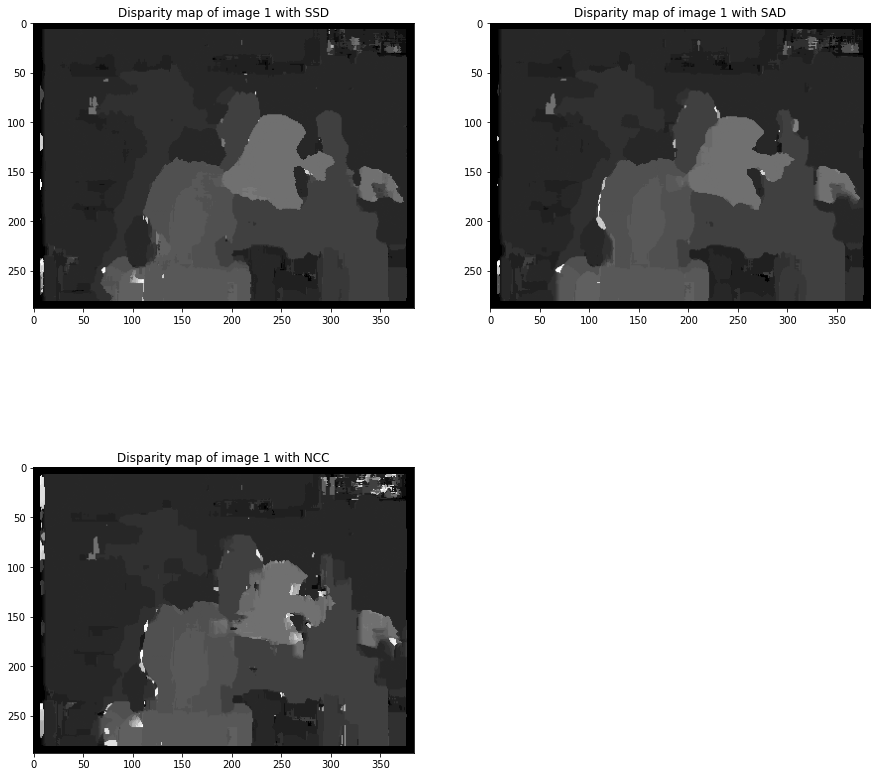

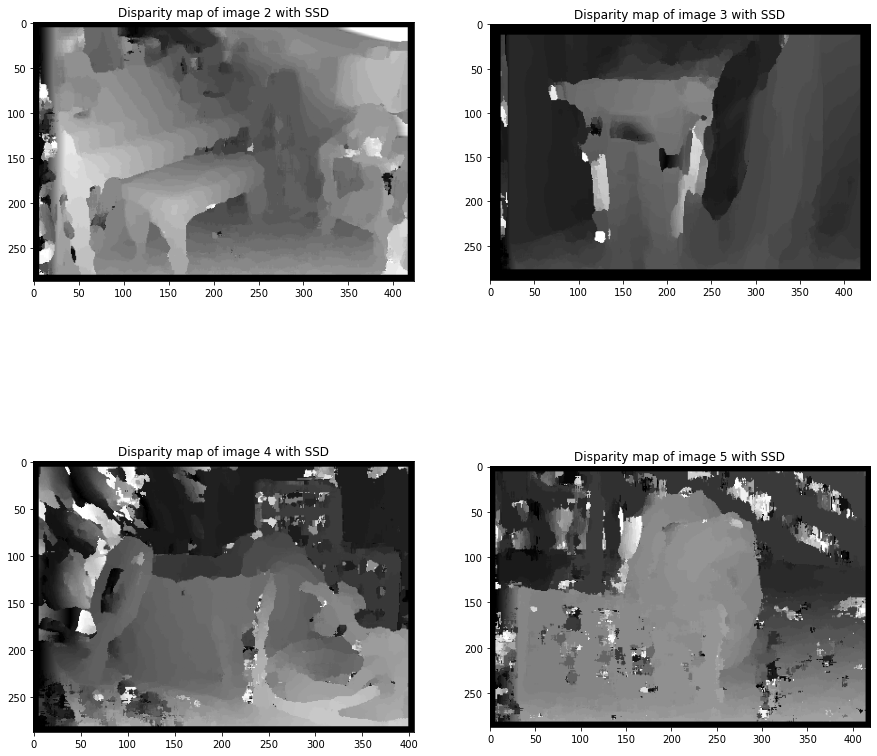

In [46]:
fig = plt.figure(figsize=(15, 15))
fig.add_subplot(221)
plt.imshow(disp_img_ssd, cmap='gray')
plt.title("Disparity map of image 1 with SSD")

fig.add_subplot(222)
plt.imshow(disp_img_sad, cmap='gray')
plt.title("Disparity map of image 1 with SAD")

fig.add_subplot(223)
plt.imshow(disp_img_ncc, cmap='gray')
plt.title("Disparity map of image 1 with NCC")
plt.show()

fig = plt.figure(figsize=(15, 15))
fig.add_subplot(221)
plt.imshow(disp_img_ssd2, cmap='gray')
plt.title("Disparity map of image 2 with SSD")

fig.add_subplot(222)
plt.imshow(disp_img_ssd3, cmap='gray')
plt.title("Disparity map of image 3 with SSD")

fig.add_subplot(223)
plt.imshow(disp_img_ssd4, cmap='gray')
plt.title("Disparity map of image 4 with SSD")

fig.add_subplot(224)
plt.imshow(disp_img_ssd5, cmap='gray')
plt.title("Disparity map of image 5 with SSD")

plt.show()


### Sparse Stereo Matching with Harris Corner Detection

In [18]:
def sparse_stereo_match(img1, img2, win_size, nonmax_sup_win_size, max_d, error_fn): 
    '''
    uses stereo matching and harris corner detection to compute sparse disparity map of two images 
    img1: left image, np.ndarray
    img2: right image, np.ndarray
    win_size: size of feature descriptor patch to use, the bigger the more blocky the output will be, int
    nonmax_sup_win_size: size of window to use for local non max suppression for harris corner responses
    max_d: the search range from 0 to value of max_d, int
    error_fn: the specific error function to use for matching
    returns: disparity map of two images, np.ndarray
    img1 and img2 must be of same shape. error_fn must be callable with parameters error_fn(patch, strip, patch_loc_x, max_d)
    '''
    assert win_size[0] % 2 == 1 and win_size[1] % 2 == 1 , "window size needs to be odd"
    assert nonmax_sup_win_size % 2 == 1 , "non-max suppression window size needs to be odd"
    assert img1.shape == img2.shape 
    assert len(img1.shape) == 2, "Should only be two dimensional, monochrome"
    gray1 = np.float32(img1)
    gray2 = np.float32(img1)
    result1 = np.zeros_like(gray1)
    result2 = np.zeros_like(gray2)
    # Running Harris corner detection
    dst1 = cv2.cornerHarris(gray1,2,3,0.04)
    dst2 = cv2.cornerHarris(gray2,2,3,0.04)
    #result is dilated for marking the corners not very important 
    dst1 = cv2.dilate(dst1,None)
    dst2 = cv2.dilate(dst2, None)
    # Local non-max suppression
    dst1 = nonmax_sup(dst1, nonmax_sup_win_size)
    dst2 = nonmax_sup(dst2, nonmax_sup_win_size)
    # Thresholding
    result1[dst1>0.01*dst1.max()]= 255
    result2[dst2>0.01*dst2.max()]= 255
    # plot harris corner responses
    fig = plt.figure(figsize=(15,15))
    fig.add_subplot(121)
    plt.imshow(result1)
    plt.title("Harris Corner Detection Response on Image 1")
    fig.add_subplot(122)
    plt.imshow(result2)
    plt.title("Harris Corner Detection Response on Image 2")
    plt.show()

    coordinates_res1 = []
    for i in range(dst1.shape[0]): 
      for j in range(dst1.shape[1]): 
        if dst1[i, j] > 0.01*dst1.max(): 
          coordinates_res1.append((i, j))
    result1 = np.pad(img1.copy(), ((win_size[0]//2, win_size[0]//2), (win_size[1]//2, win_size[1]//2)))
    result2 = np.pad(img2.copy(), ((win_size[0]//2, win_size[0]//2), (win_size[1]//2, win_size[1]//2)))
    disp = np.zeros_like(result1) # array to return with disparities 
    for coord in coordinates_res1: 
        i = coord[0] + win_size[1]//2; j = coord[1]+ win_size[0]//2
        patch = result1[i-(win_size[1]//2):i+(win_size[1]//2) + 1, j-(win_size[0]//2):j+(win_size[0]//2) + 1]
        strip = result2[i-(win_size[1]//2):i+(win_size[1]//2) + 1, :]
        #print("strip shape", strip.shape)
        patch_loc_x = j

        
        #print("loc", (i, j))
        disp[i, j] = error_fn(patch, strip, patch_loc_x, max_d ) # error_fn(patch, s, list_d)
        #print("Best", disp[i, j] )
    return disp

def nonmax_sup(corners, win_size): 
  '''
  Perform local non max suppression of harris corner responses with window size win_size
  corners: harris corner response, np.ndarray
  win_size: shape of window size to use for matching 
  returns: matrix of dimensions of corners with locally non-max suppressed responses 
  '''
  assert win_size>0 and win_size < corners.shape[0] and win_size < corners.shape[1] # ensure win_size is right dimensions
  assert win_size % 2 ==1, "window size needs to be odd"
  print("b4", corners.shape)
  corners = np.pad(corners.copy(), win_size//2)
  print("after", corners.shape)
  for i in range(win_size//2, corners.shape[0] - win_size//2):
    for j in range(win_size//2, corners.shape[1] - win_size//2): 
      patch = corners[i-win_size//2: i + win_size//2 + 1, j-win_size//2 : j+win_size//2 + 1]
      print(patch.shape, win_size)
      local_max = patch.max()
      max_ind_flat = patch.argmax()
      patch[:] = 0
      patch.flat[max_ind_flat] = local_max
  return corners[win_size//2 : corners.shape[0] - win_size//2, win_size//2 : corners.shape[1] - win_size//2 ]

Streaming output truncated to the last 5000 lines.
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(

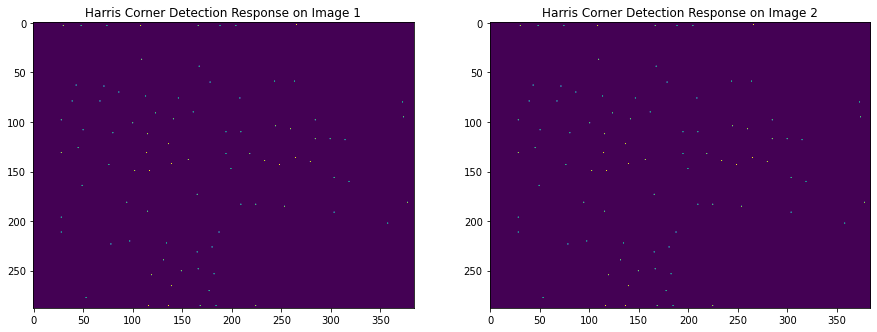

Streaming output truncated to the last 5000 lines.
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(

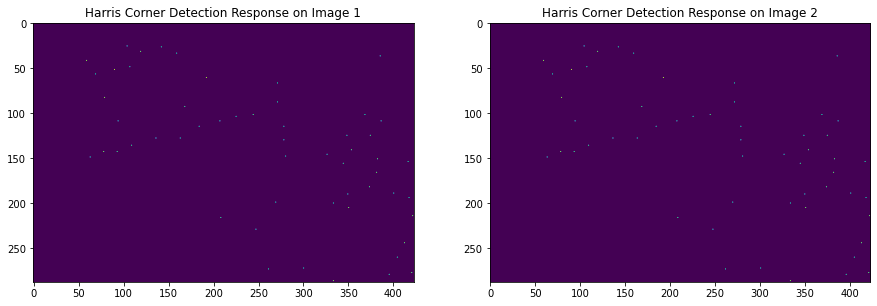

Streaming output truncated to the last 5000 lines.
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(

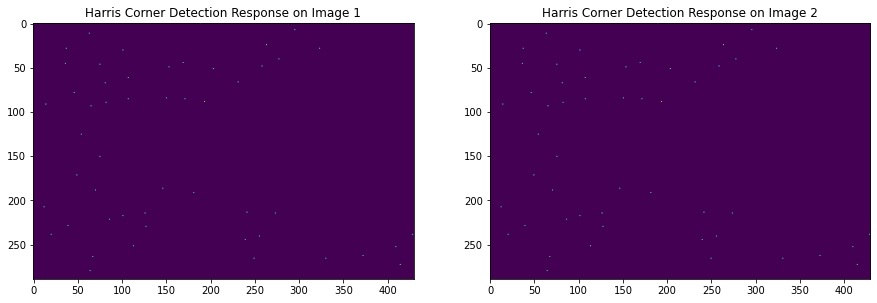

Streaming output truncated to the last 5000 lines.
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(

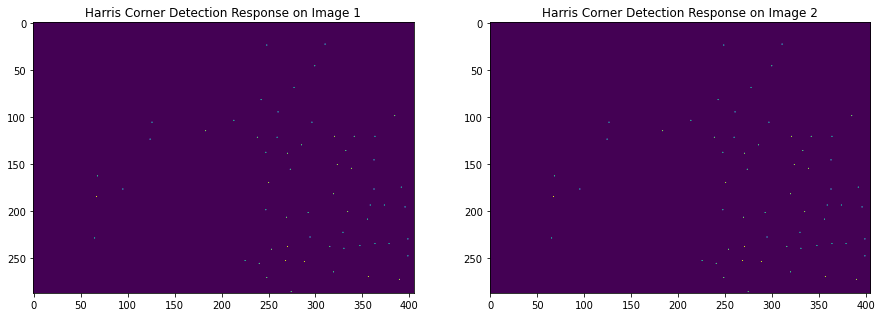

Streaming output truncated to the last 5000 lines.
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(15, 15) 15
(

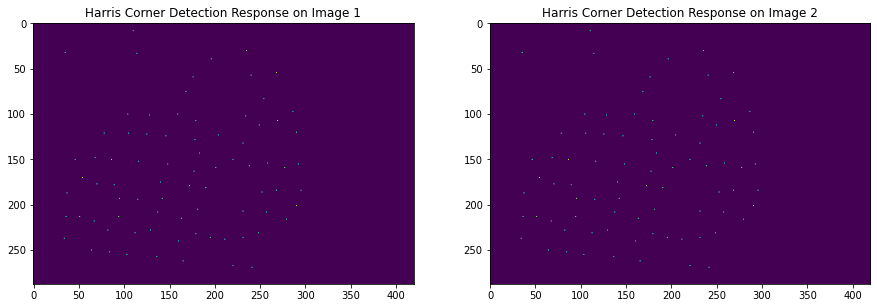

best_d, min_err 9 4788
best_d, min_err 24 4871
best_d, min_err 8 2226
best_d, min_err 11 3055
best_d, min_err 25 3982
best_d, min_err 25 5878
best_d, min_err 24 8356
best_d, min_err 25 7178
best_d, min_err 26 8718
best_d, min_err 28 8936
best_d, min_err 25 8620
best_d, min_err 9 4792
best_d, min_err 25 6981
best_d, min_err 11 6605
best_d, min_err 28 6298
best_d, min_err 27 8361
best_d, min_err 26 4696
best_d, min_err 26 3613
best_d, min_err 25 8466
best_d, min_err 10 7757
best_d, min_err 11 6614
best_d, min_err 8 8702
best_d, min_err 27 4313
best_d, min_err 36 9535
best_d, min_err 26 8507
best_d, min_err 27 6772
best_d, min_err 26 5819
best_d, min_err 24 5926
best_d, min_err 24 4520
best_d, min_err 25 8129
best_d, min_err 27 8023
best_d, min_err 25 6525
best_d, min_err 26 6974
best_d, min_err 26 6671
best_d, min_err 24 6909
best_d, min_err 28 5941
best_d, min_err 26 6531
best_d, min_err 25 5629
best_d, min_err 26 8451
best_d, min_err 24 7977
best_d, min_err 26 9266
best_d, min_err 24 8

In [19]:
disp_img_sparse_ssd = sparse_stereo_match(img1a, img1b, win_size=(11,11), nonmax_sup_win_size=15, max_d = 16, error_fn = ssd_error)
disp_img_sparse_ssd2 = sparse_stereo_match(img2a, img2b, win_size=(11,11), nonmax_sup_win_size=15, max_d = 32, error_fn = ssd_error)
disp_img_sparse_ssd3 = sparse_stereo_match(img3a, img3b, win_size=(11,11), nonmax_sup_win_size=15, max_d = 64, error_fn = ssd_error)
disp_img_sparse_ssd4 = sparse_stereo_match(img4a, img4b, win_size=(11,11), nonmax_sup_win_size=15, max_d = 64, error_fn = ssd_error)
disp_img_sparse_ssd5 = sparse_stereo_match(img5a, img5b, win_size=(11,11), nonmax_sup_win_size=15, max_d = 48, error_fn = ssd_error)


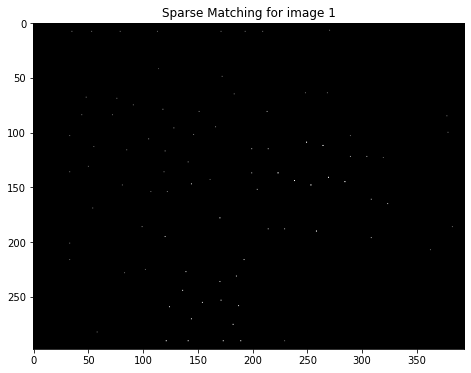

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


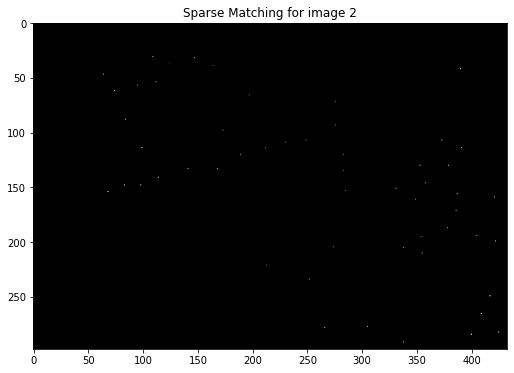

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


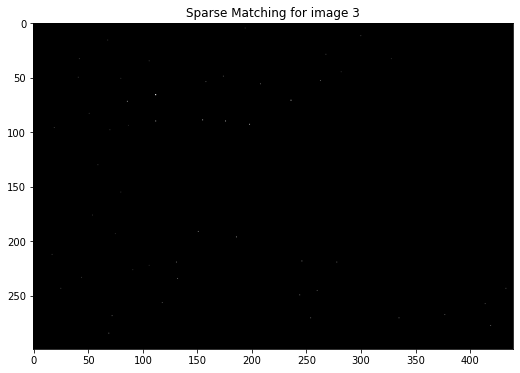

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


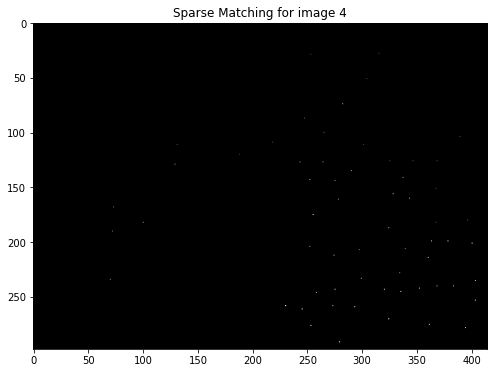

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


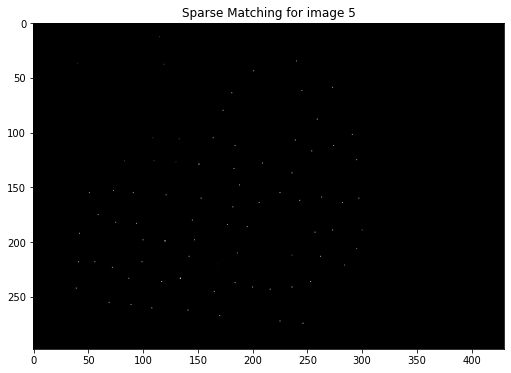

In [24]:
plt.imshow(disp_img_sparse_ssd, cmap='gray')
plt.title("Sparse Matching for image 1")
plt.show()

fig.add_subplot(322)
plt.imshow(disp_img_sparse_ssd2, cmap='gray')
plt.title("Sparse Matching for image 2")
plt.show()

fig.add_subplot(323)
plt.imshow(disp_img_sparse_ssd3, cmap='gray')
plt.title("Sparse Matching for image 3")
plt.show()

fig.add_subplot(324)
plt.imshow(disp_img_sparse_ssd4, cmap='gray')
plt.title("Sparse Matching for image 4")
plt.show()

fig.add_subplot(325)
plt.imshow(disp_img_sparse_ssd5, cmap='gray')
plt.title("Sparse Matching for image 5")
plt.show()


### Validity Checking

In [31]:
#disp_img_ssd_l = stereo_match(img1a, img1b, win_size=(15, 15), max_d = 32, error_fn = ssd_error)
disp_img_ssd_l = disp_img_ssd
#disp_img_ssd_r = stereo_match(np.fliplr(img1b), np.fliplr(img1a), win_size=(15, 15), max_d = 32, error_fn = ssd_error)
#disp_img_ssd_r = np.fliplr(disp_img_ssd_r)

disp_img_ssd_l2 = disp_img_ssd2 #= stereo_match(img2a, img2b, win_size=(15, 15), max_d = 32, error_fn = ssd_error)
#disp_img_ssd_r2 = stereo_match(np.fliplr(img2b), np.fliplr(img2a), win_size=(15, 15), max_d = 32, error_fn = ssd_error)
#disp_img_ssd_r2 = np.fliplr(disp_img_ssd_r2)

disp_img_ssd_l3 = disp_img_ssd3 #= stereo_match(img3a, img3b, win_size=(25, 25), max_d = 64, error_fn = ssd_error)
#disp_img_ssd_r3 = stereo_match(np.fliplr(img3b), np.fliplr(img3a), win_size=(25, 25), max_d = 64, error_fn = ssd_error)
#disp_img_ssd_r3 = np.fliplr(disp_img_ssd_r3)

disp_img_ssd_l4 = disp_img_ssd4 #= stereo_match(img4a, img4b, win_size=(13, 13), max_d = 64, error_fn = ssd_error)
#disp_img_ssd_r4 = stereo_match(np.fliplr(img4b), np.fliplr(img4a), win_size=(13, 13), max_d = 64, error_fn = ssd_error)
#disp_img_ssd_r4 = np.fliplr(disp_img_ssd_r4)

disp_img_ssd_l5 = disp_img_ssd5 #= stereo_match(img5a, img5b, win_size=(13, 13), max_d = 48, error_fn = ssd_error)
#disp_img_ssd_r5 = stereo_match(np.fliplr(img5b), np.fliplr(img5a), win_size=(13, 13), max_d = 48, error_fn = ssd_error)
#disp_img_ssd_r5 = np.fliplr(disp_img_ssd_r5)


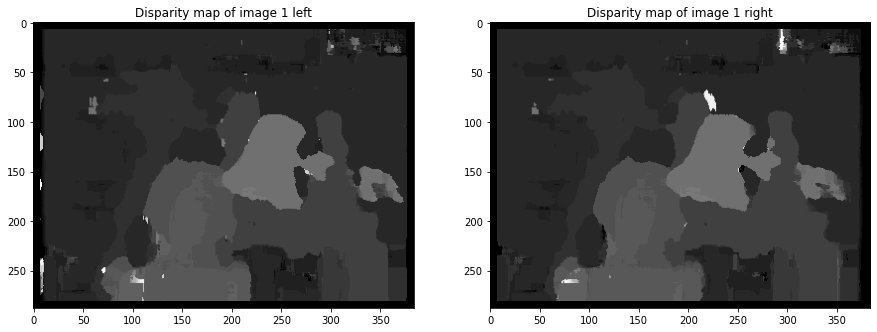

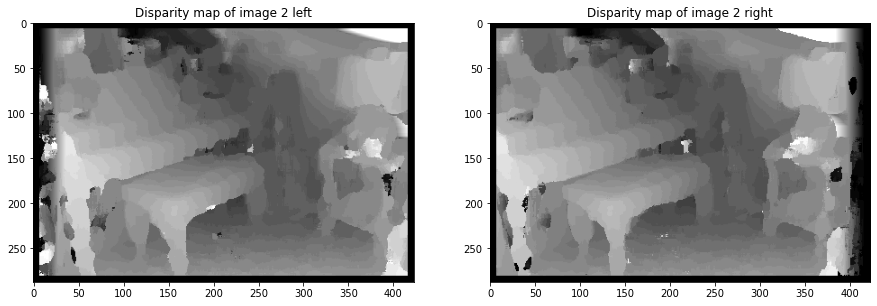

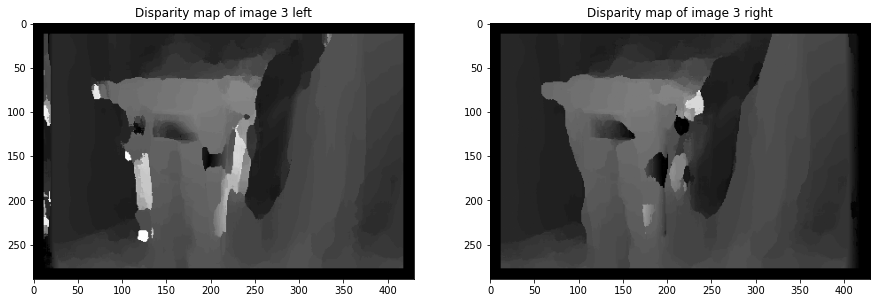

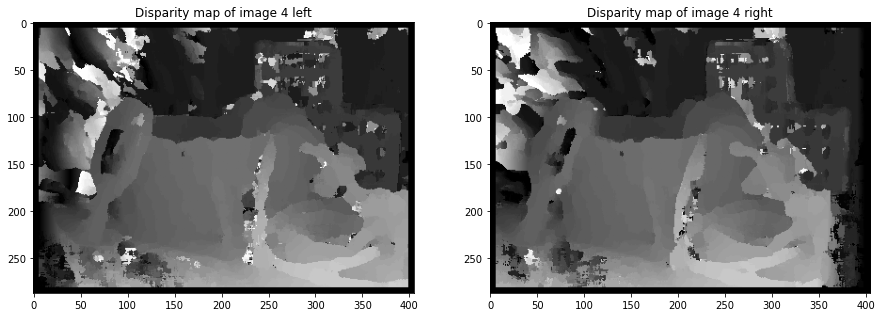

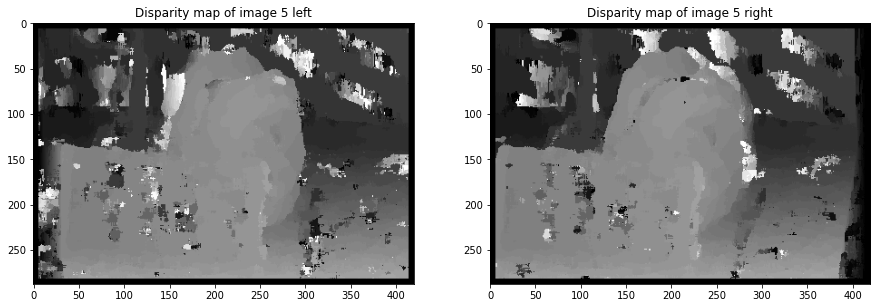

In [33]:
fig = plt.figure(figsize=(15, 15))
fig.add_subplot(121)
plt.imshow(disp_img_ssd_l, cmap='gray')
plt.title("Disparity map of image 1 left")

fig.add_subplot(122)
plt.imshow(disp_img_ssd_r, cmap='gray')
plt.title("Disparity map of image 1 right")
plt.show()

fig = plt.figure(figsize=(15, 15))
fig.add_subplot(121)
plt.imshow(disp_img_ssd_l2, cmap='gray')
plt.title("Disparity map of image 2 left")


fig.add_subplot(122)
plt.imshow(disp_img_ssd_r2, cmap='gray')
plt.title("Disparity map of image 2 right")
plt.show()

fig = plt.figure(figsize=(15, 15))
fig.add_subplot(121)
plt.imshow(disp_img_ssd_l3, cmap='gray')
plt.title("Disparity map of image 3 left")

fig.add_subplot(122)
plt.imshow(disp_img_ssd_r3, cmap='gray')
plt.title("Disparity map of image 3 right")
plt.show()

fig = plt.figure(figsize=(15, 15))
fig.add_subplot(121)
plt.imshow(disp_img_ssd_l4, cmap='gray')
plt.title("Disparity map of image 4 left")

fig.add_subplot(122)
plt.imshow(disp_img_ssd_r4, cmap='gray')
plt.title("Disparity map of image 4 right")
plt.show()

fig = plt.figure(figsize=(15, 15))
fig.add_subplot(121)
plt.imshow(disp_img_ssd_l5, cmap='gray')
plt.title("Disparity map of image 5 left")

fig.add_subplot(122)
plt.imshow(disp_img_ssd_r5, cmap='gray')
plt.title("Disparity map of image 5 right")
plt.show()


(3, 3)

In [34]:
def validity_check(disp1, disp2): 
  '''
  Perform validity checking of two disparity maps by comparing pixelwise and setting to zero all pixels that are not equal in both disparity maps. 
  disp1: first disparity map, np.ndarray
  disp2: second disparity map, np.ndarray
  returns: validated disparity map 
  '''
  assert disp1.shape == disp2.shape
  assert len(disp1.shape) == 2
  result = disp1.copy()
  diff_img = np.abs(disp1 - disp2)
  result[diff_img > 0] = 0 #set to zero all pixels not same
  kernel = np.ones((5,5),np.uint8) 
  result = cv2.dilate(result,kernel,iterations = 1)
  return result

def average_pixel_with_value(img, win_size, value): 
  '''
  Perform mean blurring of pixels with value of 'value'
  img: image to search for pixels
  win_size: window size to take mean and set all pixels in window to mean, int
  value: value to check for in order to perform averaging
  returns: averaged image
  '''
  assert win_size > 0
  img = np.pad(img.copy(), win_size//2)
  result = img.copy()
  for i in range(win_size//2, img.shape[0] - win_size//2): 
    for j in range(win_size//2, img.shape[1] - win_size//2): 
      if img[i, j] == value: 
        patch_img = img[i-win_size//2 : i + win_size//2 + 1, j-win_size//2 : j + win_size//2 + 1]
        patch_res = result[i-win_size//2 : i + win_size//2 + 1, j-win_size//2 : j + win_size//2 + 1]
        assert patch_img.shape == tuple((win_size, win_size)) and patch_res.shape == tuple((win_size, win_size))
        patch_res[:] = patch_img.mean()
  return result
      


In [41]:
disp_check =  validity_check(disp_img_ssd_l, disp_img_ssd_r)
disp_check_avg = average_pixel_with_value(disp_check, win_size = 3, value=0)

disp_check2 =  validity_check(disp_img_ssd_l2, disp_img_ssd_r2)
disp_check_avg2 = average_pixel_with_value(disp_check2, win_size = 3, value=0)

disp_check3 =  validity_check(disp_img_ssd_l3, disp_img_ssd_r3)
disp_check_avg3 = average_pixel_with_value(disp_check3, win_size = 3, value=0)

disp_check4 =  validity_check(disp_img_ssd_l4, disp_img_ssd_r4)
disp_check_avg4 = average_pixel_with_value(disp_check4, win_size = 3, value=0)

disp_check5 =  validity_check(disp_img_ssd_l5, disp_img_ssd_r5)
disp_check_avg5 = average_pixel_with_value(disp_check5, win_size = 3, value=0)


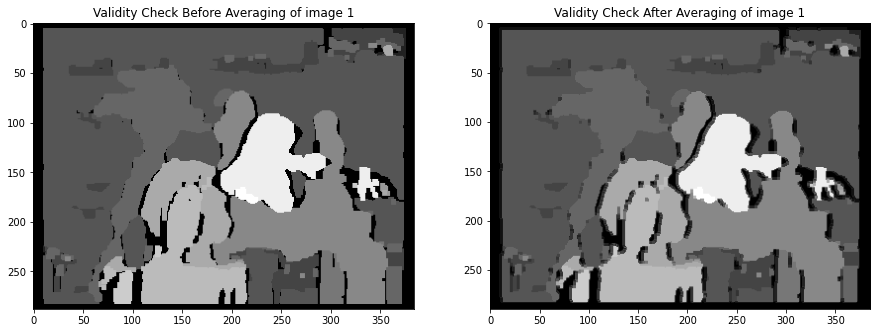

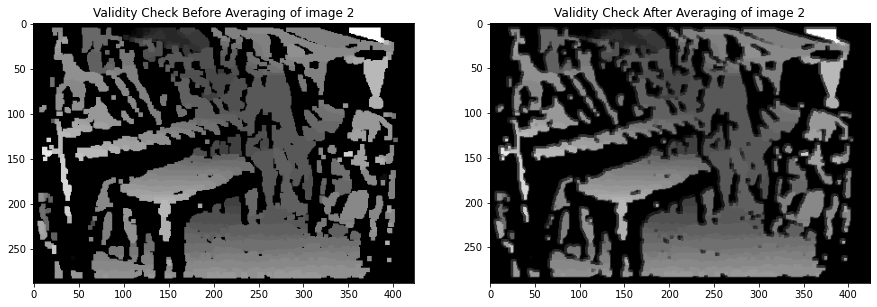

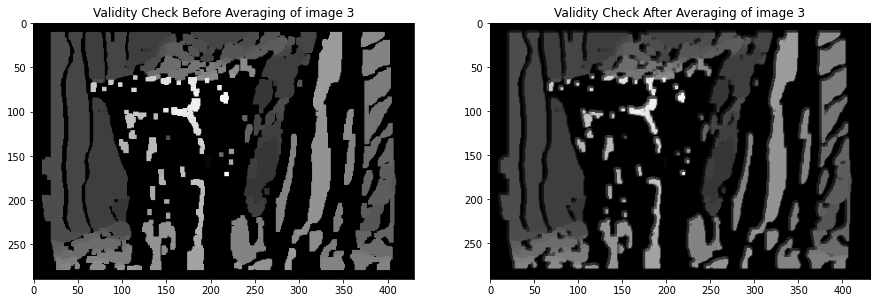

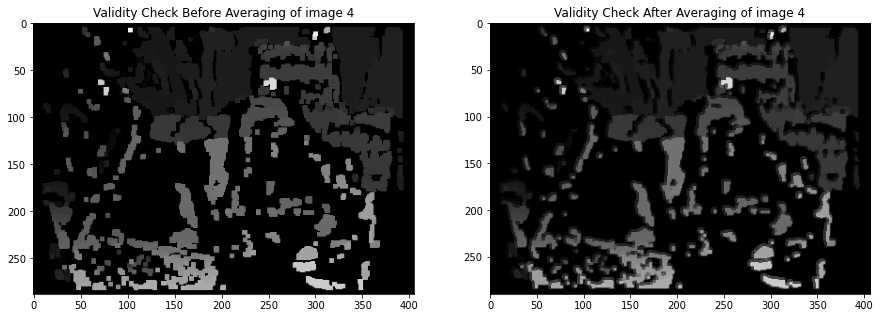

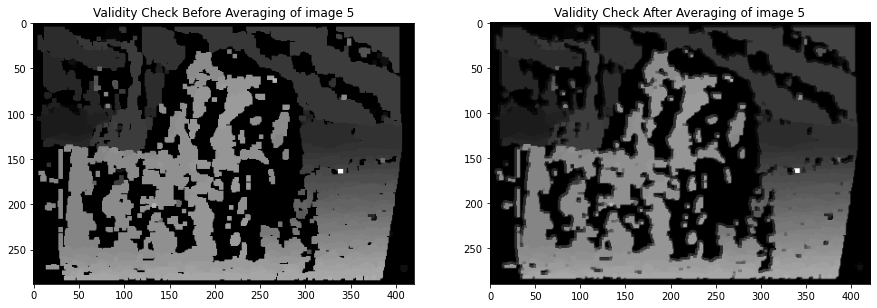

In [44]:
fig = plt.figure(figsize=(15, 15))
fig.add_subplot(121)
plt.imshow(disp_check, cmap='gray')
plt.title("Validity Check Before Averaging of image 1")

fig.add_subplot(122)
plt.imshow(disp_check_avg, cmap='gray')
plt.title("Validity Check After Averaging of image 1")
plt.show()

fig = plt.figure(figsize=(15, 15))
fig.add_subplot(121)
plt.imshow(disp_check2, cmap='gray')
plt.title("Validity Check Before Averaging of image 2")


fig.add_subplot(122)
plt.imshow(disp_check_avg2, cmap='gray')
plt.title("Validity Check After Averaging of image 2")
plt.show()

fig = plt.figure(figsize=(15, 15))
fig.add_subplot(121)
plt.imshow(disp_check3, cmap='gray')
plt.title("Validity Check Before Averaging of image 3")

fig.add_subplot(122)
plt.imshow(disp_check_avg3, cmap='gray')
plt.title("Validity Check After Averaging of image 3")
plt.show()

fig = plt.figure(figsize=(15, 15))
fig.add_subplot(121)
plt.imshow(disp_check4, cmap='gray')
plt.title("Validity Check Before Averaging of image 4")

fig.add_subplot(122)
plt.imshow(disp_check_avg4, cmap='gray')
plt.title("Validity Check After Averaging of image 4")
plt.show()

fig = plt.figure(figsize=(15, 15))
fig.add_subplot(121)
plt.imshow(disp_check5, cmap='gray')
plt.title("Validity Check Before Averaging of image 5")

fig.add_subplot(122)
plt.imshow(disp_check_avg5, cmap='gray')
plt.title("Validity Check After Averaging of image 5")
plt.show()
